In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy.integrate import solve_ivp
from numpy import genfromtxt
from scipy.integrate import quad

In [2]:
def SI(t,y,param):
    mu, beta, kappa, sigma, N = param
    I = y
    dIdt = beta*I*(N-I) / N + kappa * (N-I) - (mu + sigma)*I
    return [dIdt]

In [3]:
def SIS(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, I = y
    dSdt = mu*N - mu*S - beta*I*S / N - kappa * S + sigma*I
    dIdt = beta*I*S / N + kappa * S - mu*I - sigma*I
    return [dSdt,dIdt]

In [4]:
def SIR(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, I, R = y
    dSdt = mu*N - mu*S - beta*I*(N-I) / N + kappa * (N-I)
    dIdt = beta*I*(N-I) / N + kappa * (N-I) - mu*I - sigma*I
    dRdt = sigma*I - mu*R
    return [dSdt,dIdt,dRdt]

In [5]:
def SEIR(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, E, I, R = y
    dSdt = mu*N - mu*S - beta*I*(N-I) / N + kappa * (N-I)
    dEdt = beta*I*(N-I) / N + kappa * (N-I) - (1000)*E - mu*E
    dIdt = (1000)*E - mu*I - sigma*I
    dRdt = sigma*I - mu*R
    return [dSdt,dEdt,dIdt,dRdt]

In [6]:
# make sample list of kappa values
kappa_list = 10.0 ** (np.linspace(-7,-4,30))
# make sample list of N values
N_list = 10.0 ** (np.linspace(2,5,30))

kappa_list = kappa_list[-5:-1]
N_list = N_list[-5:-1]
t_points = np.linspace(0,200,51)

12.415184634978747
11.387755102040817
0.027060083954156034


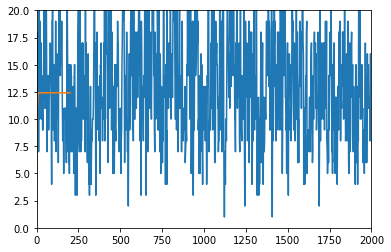

In [9]:
projPath = '/Users/MegGarr/Documents/from_LANL/SIS_SIRk/alt_pdf/data/out/'

def plotBoth(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt(projPath + mdl_name + '/' + flname, delimiter=',')
    # Organize the data and find KL div
    inf_data = np.array(simdat[:,1]) 
    mean_inf = np.mean(inf_data[-50:-1])
    plt.plot(simdat[:,0],inf_data)
    



    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])
#     param = np.array([5e-5, 0.5, 2e-5, 1, N])

    ic_util = np.array([N,0])

    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIS(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-10,
                     rtol = 1e-10)

    plt.plot(sol1.t, sol1.y[1,:])
#     plt.plot(simdat[:,0],inf_data)
    plt.axis([0,2000,0,20])
    Imean_ode = sol1.y[1][-1]
    print(Imean_ode)
    print(mean_inf)
    print(np.log( abs(Imean_ode - mean_inf) ))
            

plotBoth('SIS',kappa_list[3],N_list[3])

In [ ]:
projPath = '/Users/MegGarr/Documents/from_LANL/SIS_SIRk/alt_pdf/data/out/'

def plotBoth(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt(projPath + mdl_name + '/' + flname, delimiter=',')
    # Organize the data and find KL div
    inf_data = np.array(simdat[:,1]) 
    mean_inf = np.mean(inf_data[-50:-1])
    plt.plot(simdat[:,0],inf_data)
    



    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])
#     param = np.array([5e-5, 0.5, 2e-5, 1, N])

    ic_util = np.array([N,0])

    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIS(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-10,
                     rtol = 1e-10)

    plt.plot(sol1.t, sol1.y[1,:])
#     plt.plot(simdat[:,0],inf_data)
    plt.axis([0,2000,0,20])
    Imean_ode = sol1.y[1][-1]
    print(Imean_ode)
    print(mean_inf)
    print(np.log( abs(Imean_ode - mean_inf) ))
            

plotBoth('SIR',kappa_list[3],N_list[3])

In [13]:
projPath = '/Users/MegGarr/Documents/from_LANL/SIS_SIRk/alt_pdf/data/out/'
def genFlName(mdl_name, kappa_val, N_val):
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    return flname

def meanBehavior(mdl_name,kappa_list,N_list):
    n_kappa = len(kappa_list)
    n_pop = len(N_list)
    kldiv_mat = np.zeros([n_kappa,n_pop])
    k_val_vec = np.zeros(n_kappa)
    N_val_vec = np.zeros(n_pop)
            
    for i in range(len(kappa_list)):
        for j in range(len(N_list)):
            # Make strings for file names
            kappa = kappa_list[i]
            ku = "%.3E" % kappa
            ku = ku.replace(".","p")
            ku = ku.replace("-","m")
            ku = ku.replace("+","")

            N = N_list[j]
            Nu = "%.3E" % N
            Nu = Nu.replace(".","p")
            Nu = Nu.replace("-","m")
            Nu = Nu.replace("+","")

            flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
            # load the sim-data
            simdat = genfromtxt(projPath + mdl_name + '/' + flname, delimiter=',')
            # Organize the data and find KL div
            inf_data = np.array(simdat[:,1])
            mean_inf = np.mean(inf_data)


            #
            ##
            ###
            ####
            ###
            ##
            #
            
            # 
            # mu, beta, kappa, sigma, N
            param = np.array([5e-5, 0.5, kappa, 1, N])                

            ic_util = np.array([N,0])

            tend=t_points[-1]
            sol1 = solve_ivp(lambda t, y: SIS(t, y, param),
                             (0, tend),
                             ic_util,
                             method='RK45',
                             t_eval = t_points,
                             atol = 1e-10,
                             rtol = 1e-10)
            Imean_ode = sol1.y[1,:][-1]
#             print(Imean_ode)
#             print(mean_inf)
#             print(np.log( abs(Imean_ode - mean_inf) ))
            
            print(np.mean(sol1.y[1,:]))
            print(np.mean(inf_data))
            

meanBehavior('SIS',kappa_list,N_list)

2.906514799936906
2.8691308691308692
3.6882539362549243
3.6393606393606395
4.680250414905654
4.852147852147852
5.93905526157016
6.242757242757243
3.6881024397042625
3.958041958041958
4.68005817169083
5.045954045954046
5.938811312427367
6.105894105894106
7.5361199606403275
7.87012987012987
4.6798142565820315
4.955044955044955
5.938501793666193
6.15984015984016
7.535727193402526
7.646353646353647
9.56254393896019
9.704295704295705
5.938109095951862
6.123876123876124
7.5352288753168715
7.614385614385615
9.561911592742408
9.596403596403597
12.133692926909633
12.962037962037963


In [ ]:
# projPath = '/Users/MegGarr/Documents/from_LANL/SIS_SIRk/alt_pdf/data/out/'
# def genFlName(mdl_name, kappa_val, N_val):
#     kappa = kappa_val
#     ku = "%.3E" % kappa
#     ku = ku.replace(".","p")
#     ku = ku.replace("-","m")
#     ku = ku.replace("+","")

#     N = N_val
#     Nu = "%.3E" % N
#     Nu = Nu.replace(".","p")
#     Nu = Nu.replace("-","m")
#     Nu = Nu.replace("+","")

#     flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
#     return flname

# def meanBehavior(mdl_name,kappa_list,N_list):
#     n_kappa = len(kappa_list)
#     n_pop = len(N_list)
#     kldiv_mat = np.zeros([n_kappa,n_pop])
#     k_val_vec = np.zeros(n_kappa)
#     N_val_vec = np.zeros(n_pop)
            
#     for i in range(len(kappa_list)):
#         for j in range(len(N_list)):
#             # Make strings for file names
#             kappa = kappa_list[i]
#             ku = "%.3E" % kappa
#             ku = ku.replace(".","p")
#             ku = ku.replace("-","m")
#             ku = ku.replace("+","")

#             N = N_list[j]
#             Nu = "%.3E" % N
#             Nu = Nu.replace(".","p")
#             Nu = Nu.replace("-","m")
#             Nu = Nu.replace("+","")

#             flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
#             # load the sim-data
#             simdat = genfromtxt(projPath + mdl_name + '/' + flname, delimiter=',')
#             # Organize the data and find KL div
#             inf_data = np.array(simdat[:,1])
#             mean_inf = np.mean(inf_data)


#             #
#             ##
#             ###
#             ####
#             ###
#             ##
#             #
            
#             # 
#             # mu, beta, kappa, sigma, N
#             param = np.array([5e-5, 0.5, kappa, 1, N])                

#             ic_util = np.array([0])

#             tend=t_points[-1]
#             sol1 = solve_ivp(lambda t, y: SI(t, y, param),
#                              (0, tend),
#                              ic_util,
#                              method='RK45',
#                              t_eval = t_points,
#                              atol = 1e-10,
#                              rtol = 1e-10)
#             Imean_ode = sol1.y[0][-1]
#             print(np.log( abs(Imean_ode - mean_inf) ))

# meanBehavior('SI',kappa_list,N_list)

In [ ]:
kappa_list[3]

In [ ]:
# kappa= 2
# N=1000
# param = np.array([5e-5, 0.5, kappa, 1, N])
# print(param)
# mdl_name='SI'
# def FUN_util(t, y):
#     ret_string = mdl_name+"(y,t,param)"
#     return eval(ret_string)
# FUN_util(1,np.array([1]))

In [ ]:
projPath = '/Users/MegGarr/Documents/from_LANL/SIS_SIRk/alt_pdf/data/out/'
def genFlName(mdl_name, kappa_val, N_val):
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    return flname

def meanBehavior(mdl_name,kappa_list,N_list):
    n_kappa = len(kappa_list)
    n_pop = len(N_list)
    kldiv_mat = np.zeros([n_kappa,n_pop])
    k_val_vec = np.zeros(n_kappa)
    N_val_vec = np.zeros(n_pop)
            
    for i in range(len(kappa_list)):
        for j in range(len(N_list)):
            # Make strings for file names
            kappa = kappa_list[i]
            ku = "%.3E" % kappa
            ku = ku.replace(".","p")
            ku = ku.replace("-","m")
            ku = ku.replace("+","")

            N = N_list[j]
            Nu = "%.3E" % N
            Nu = Nu.replace(".","p")
            Nu = Nu.replace("-","m")
            Nu = Nu.replace("+","")

            flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
            # load the sim-data
            simdat = genfromtxt(projPath + mdl_name + '/' + flname, delimiter=',')
            # Organize the data and find KL div
            inf_data = np.array(simdat[:,1])
            mean_inf = np.mean(inf_data)


            #
            ##
            ###
            ####
            ###
            ##
            #
            
            # 
            # mu, beta, kappa, sigma, N
            param = np.array([5e-5, 0.5, kappa, 1, N])                

            ic_util = np.array([0])

            tend=t_points[-1]
            sol1 = solve_ivp(lambda t, y: SI(t, y, param),
                             (0, tend),
                             ic_util,
                             method='RK45',
                             t_eval = t_points,
                             atol = 1e-10,
                             rtol = 1e-10)
            Imean_ode = sol1.y[0][-1]
            print(np.log( abs(Imean_ode - mean_inf) )) 
            




In [ ]:
# # Make solution matrix so that rows is num time points and cols num of models
# # will only collect output for infectious class
# n_mods = 4

# tend = 200 # Final time point
# t_points = np.linspace(0, tend, tend+1)
# n_t = len(t_points)

# # initialize data matrix
# sol_mat = np.zeros([n_t,n_mods])
# sol_mat.shape

In [ ]:
# param = [5e-5, 0.5, 1e-4, 1, 1e5]
# def SI_util(t, y): # This puts the function into format for "solve_ivp"
#     return SI(y,t,param)
    
# sol1 = solve_ivp(SI_util, (0, tend),
#                 np.array([0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)
# # plt.plot(sol1.t,np.log10(sol1.y[0,:]),'.k',MarkerSize=8)

# # SIS
# def SIS_util(t, y): # This puts the function into format for "solve_ivp"
#     return SIS(y,t,param)
    
# sol2 = solve_ivp(SIS_util, (0, tend),
#                 np.array([param[4], 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)

# # plt.plot(sol2.t,np.log10(sol2.y[1,:]),'xb',MarkerSize=8)
# # np.abs(np.log10(sol1.y[0,:]) - np.log10(sol2.y[1,:]))

# # SIR
# def SIR_util(t, y): # This puts the function into format for "solve_ivp"
#     return SIR(y,t,param)
    
# sol3 = solve_ivp(SIR_util, (0, tend),
#                 np.array([param[4], 0, 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)

# # plt.plot(sol3.t,np.log10(sol3.y[1,:]))
# # np.abs(np.log10(sol1.y[0,:]) - np.log10(sol3.y[1,:]))

# # SEIR
# def SEIR_util(t, y): # This puts the function into format for "solve_ivp"
#     return SEIR(y,t,param)
    
# sol4 = solve_ivp(SEIR_util, (0, tend),
#                 np.array([param[4], 0, 0, 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)

In [ ]:
# param = [5e-5, 0.5, 1e-4, 1, 1e5]
# def SI_util(t, y): # This puts the function into format for "solve_ivp"
#     return SI(y,t,param)
    
# sol1 = solve_ivp(SI_util, (0, tend),
#                 np.array([0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)
# # plt.plot(sol1.t,np.log10(sol1.y[0,:]),'.k',MarkerSize=8)

# # SIS
# def SIS_util(t, y): # This puts the function into format for "solve_ivp"
#     return SIS(y,t,param)
    
# sol2 = solve_ivp(SIS_util, (0, tend),
#                 np.array([param[4], 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)

# # plt.plot(sol2.t,np.log10(sol2.y[1,:]),'xb',MarkerSize=8)
# # np.abs(np.log10(sol1.y[0,:]) - np.log10(sol2.y[1,:]))

# # SIR
# def SIR_util(t, y): # This puts the function into format for "solve_ivp"
#     return SIR(y,t,param)
    
# sol3 = solve_ivp(SIR_util, (0, tend),
#                 np.array([param[4], 0, 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)

# # plt.plot(sol3.t,np.log10(sol3.y[1,:]))
# # np.abs(np.log10(sol1.y[0,:]) - np.log10(sol3.y[1,:]))

# # SEIR
# def SEIR_util(t, y): # This puts the function into format for "solve_ivp"
#     return SEIR(y,t,param)
    
# sol4 = solve_ivp(SEIR_util, (0, tend),
#                 np.array([param[4], 0, 0, 0]),
#                 method='RK45',
#                 t_eval = t_points,
#                atol = 1e-10,
#                rtol = 1e-10)
# # plt.plot(sol4.t,np.log10(sol4.y[2,:]),'or',MarkerSize=8)
# # np.abs(np.log10(sol1.y[0,:]) - np.log10(sol4.y[1,:]))

In [ ]:
#     kl_dict = {"KLDiv Matrix" : kldiv_mat,
#               "kval Vector" : k_val_vec,
#               "Nval Vector" : N_val_vec}
    
#     with open(mdl_name+'KLdat.pkl', 'wb') as handle:
#         pickle.dump(kl_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

#     return kl_dict

In [ ]:
#             def FUN_util(t, y):
#                 ret_string = mdl_name+"(y,t,param)"
#                 return eval(ret_string)
#             if mdl_name=='SI':
#                 sol_len = 1
#             elif mdl_name=='SIS':
#                 sol_len = 2
#             elif mdl_name=='SIR':
#                 sol_len = 3
#             elif mdl_name=='SEIR':
#                 sol_len = 4
                

#             ic_util = np.zeros(sol_len)
#             ic_util[0] = N 

#             tend=t_points[-1]
#             sol1 = solve_ivp(FUN_util, (0, tend),
#                             ic_util,
#                             method='RK45',
#                             t_eval = t_points,
#                            atol = 1e-10,
#                            rtol = 1e-10)
#             print(sol1.y[0][-1])
# #             if mdl_name=='SEIR':
# #                 Imean_ode = sol1.y[2]
# #             elif mdl_name=='SI':
# #                 Imean_ode = sol1.y[0]
# #             else:
# #                 Imean_ode = sol1.y[1]
                
# #             print(Imean_ode[-1] - mean_inf)


